In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_antwerp_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('antwerp')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/antwerp_{date}.csv',index=False)
get_listings_antwerp_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_antwerp = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_antwerp)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(antwerp_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 1750 AirBnb listings.


In [4]:
antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
antwerp_raw_df_12_12_2020.shape


(1751, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for antwerp
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_antwerp = glob.glob('antwerp/**.csv')
files_antwerp

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['antwerp/Antwerp_2021-01.csv',
 'antwerp/Antwerp_2021-02.csv',
 'antwerp/Antwerp_2021-03.csv',
 'antwerp/Antwerp_2021-07.csv',
 'antwerp/Antwerp_2021-06.csv',
 'antwerp/Antwerp_2021-04.csv',
 'antwerp/Antwerp_2021-10.csv',
 'antwerp/Antwerp_2021-08.csv',
 'antwerp/Antwerp_2021-09.csv',
 'antwerp/Antwerp_2020-11.csv',
 'antwerp/Antwerp_2020-12.csv']

In [12]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(antwerp_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(antwerp_raw_df_12_12_2020['price'].mean(),2)}.")

antwerp_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(antwerp_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_1_9_2021['price'].mean(),2)}.")

antwerp_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(antwerp_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_2_8_2021['price'].mean(),2)}.")

antwerp_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(antwerp_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_3_4_2021['price'].mean(),2)}.")

antwerp_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(antwerp_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_4_9_2021['price'].mean(),2)}.")

#antwerp_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(antwerp_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_5_19_2021['price'].mean(),2)}.")

antwerp_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(antwerp_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_6_3_2021['price'].mean(),2)}.")

antwerp_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(antwerp_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_7_4_2021['price'].mean(),2)}.")

antwerp_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(antwerp_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_8_6_2021['price'].mean(),2)}.")

antwerp_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(antwerp_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_9_7_2021['price'].mean(),2)}.")

antwerp_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(antwerp_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_10_6_2021['price'].mean(),2)}.")

#antwerp_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/antwerp_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(antwerp_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 1751 AirBnb listings; the avg price is €94.93.
The 1_9_2021 dataset contains 1717 AirBnb listings; the avg price is €91.93.
The 2_8_2021 dataset contains 1716 AirBnb listings; the avg price is €91.52.
The 3_4_2021 dataset contains 1749 AirBnb listings; the avg price is €96.45.
The 4_9_2021 dataset contains 1739 AirBnb listings; the avg price is €99.19.
The 6_3_2021 dataset contains 1810 AirBnb listings; the avg price is €99.63.
The 7_4_2021 dataset contains 1843 AirBnb listings; the avg price is €100.1.
The 8_6_2021 dataset contains 1792 AirBnb listings; the avg price is €100.99.
The 9_7_2021 dataset contains 1776 AirBnb listings; the avg price is €103.83.
The 10_6_2021 dataset contains 1750 AirBnb listings; the avg price is €106.99.


In [15]:
df_list_antwerp = [antwerp_raw_df_12_12_2020, antwerp_raw_df_1_9_2021, antwerp_raw_df_2_8_2021,
           antwerp_raw_df_3_4_2021, antwerp_raw_df_4_9_2021, antwerp_raw_df_6_3_2021, antwerp_raw_df_7_4_2021,
           antwerp_raw_df_8_6_2021, antwerp_raw_df_9_7_2021, antwerp_raw_df_10_6_2021]

dates_antwerp = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_antwerp = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_antwerp = []

def airbnb_parse_antwerp(df_list, files):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_{file}.csv")
        print(f"The {file} antwerp dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_antwerp(df_list, dates):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_antwerp.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_antwerp)

antwerp_parse = airbnb_parse_antwerp(df_list_antwerp, files_antwerp)


The 2020-12 antwerp dataset contains 1751 AirBnb listings -- the avg price is €94.93.
The 2021-01 antwerp dataset contains 1717 AirBnb listings -- the avg price is €91.93.
The 2021-02 antwerp dataset contains 1716 AirBnb listings -- the avg price is €91.52.
The 2021-03 antwerp dataset contains 1749 AirBnb listings -- the avg price is €96.45.
The 2021-04 antwerp dataset contains 1739 AirBnb listings -- the avg price is €99.19.
The 2021-06 antwerp dataset contains 1810 AirBnb listings -- the avg price is €99.63.
The 2021-07 antwerp dataset contains 1843 AirBnb listings -- the avg price is €100.1.
The 2021-08 antwerp dataset contains 1792 AirBnb listings -- the avg price is €100.99.
The 2021-09 antwerp dataset contains 1776 AirBnb listings -- the avg price is €103.83.
The 2021-10 antwerp dataset contains 1750 AirBnb listings -- the avg price is €106.99.


In [16]:
antwerp_summary = airbnb_to_frame_antwerp(df_list_antwerp, files_antwerp)
antwerp_summary['Date of scrape'] = pd.to_datetime(antwerp_summary['Date of scrape'])
antwerp_summary['City'] = 'antwerp'

dfi.export(antwerp_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/airbnb_antwerp_summary.png")


In [17]:
master_df_antwerp = pd.concat(df_list_antwerp)
master_df_antwerp_unique = master_df_antwerp.drop_duplicates(subset='id')
master_df_antwerp_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50904,aplace/antwerp: cosy suite - fashion district,234077,Karin,NaN,Historisch Centrum,51.21825,4.39901,Hotel room,158,1,1,2015-05-06,0.01,4,246,NaN,NaN
1,116134,Trendy Vacation Apartment Antwerp,586942,Paul,NaN,Eilandje,51.23051,4.40593,Entire home/apt,150,2,102,2020-11-16,0.95,1,352,NaN,NaN
2,224333,Large stylish room in 1930s house + garden,1167377,Geert,NaN,Deurne Zuid West,51.19772,4.45853,Private room,16,14,2,2020-07-04,0.02,2,1,NaN,NaN
3,224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,1263933,Kristien,NaN,Sint-Andries,51.21722,4.39790,Entire home/apt,86,2,337,2020-12-28,3.12,1,362,NaN,NaN
4,328911,Large Modern Apt W Great Park Views,1263814,Tinne,NaN,Stadspark,51.21078,4.41050,Entire home/apt,44,15,59,2019-10-30,0.55,1,57,NaN,NaN


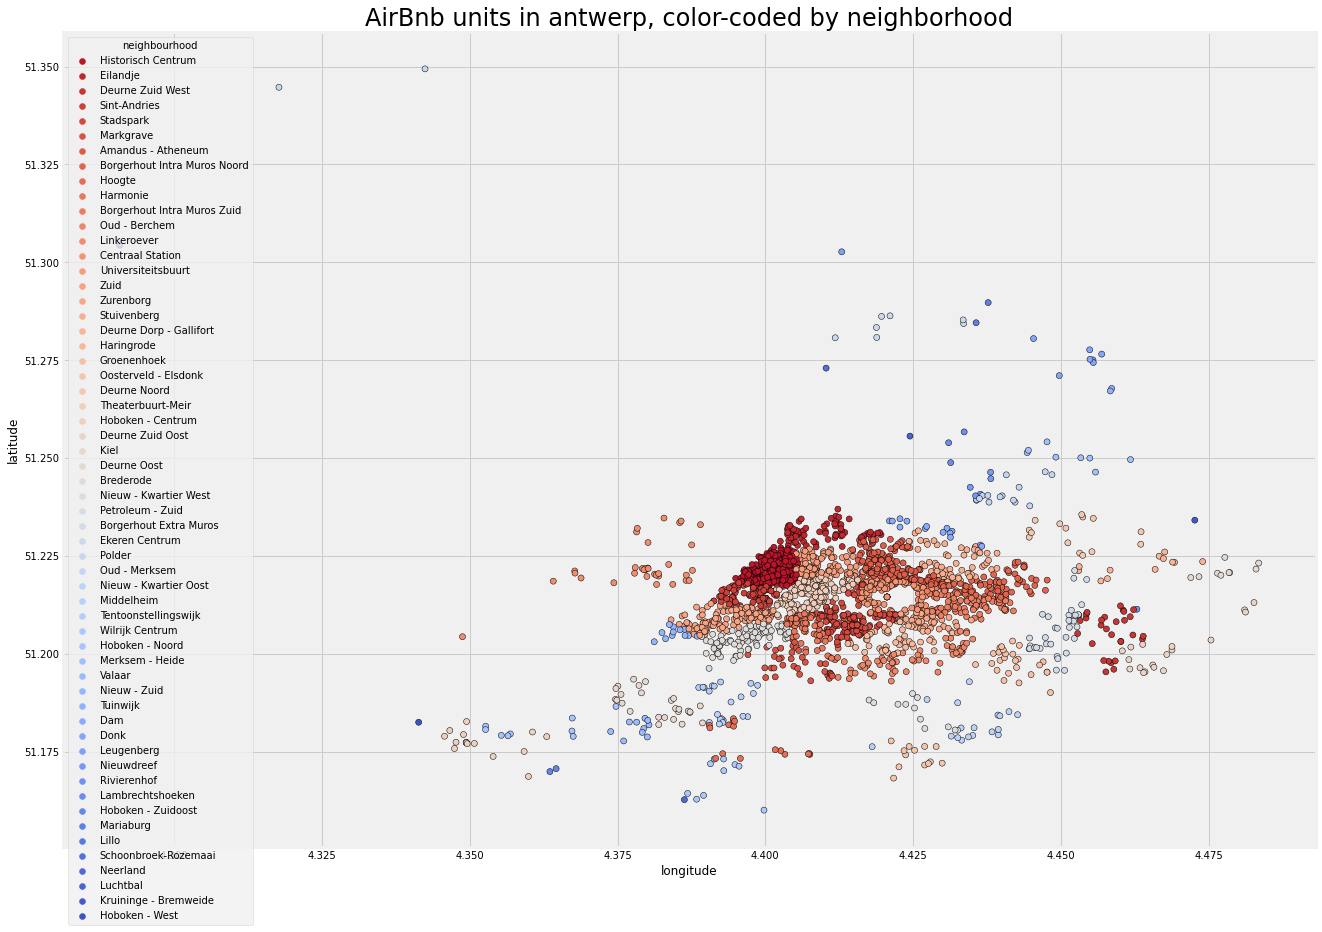

In [18]:
title = 'AirBnb units in antwerp, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_antwerp_unique.longitude, master_df_antwerp_unique.latitude, hue = master_df_antwerp_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/airbnb_antwerp_map.png')
plt.show()

## Add review data through a join

In [20]:
df_reviews = pd.concat([antwerp_raw_df_10_6_2021,raw_df_antwerp],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    782
4    413
3    141
6    101
1     62
5     56
Name: accommodates, dtype: int64

## Regression

In [21]:
#df_reviews_.columns

In [22]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [23]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  44.63686401558556
Coefficients:  [ 10.97599921  14.95340051  -5.69995954   0.62658146   3.84961555
 -48.88427859  35.83503025   6.06508201   0.96741612]
LinearRegression()


In [24]:
y_pred2 = regr.predict(X_)

In [25]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


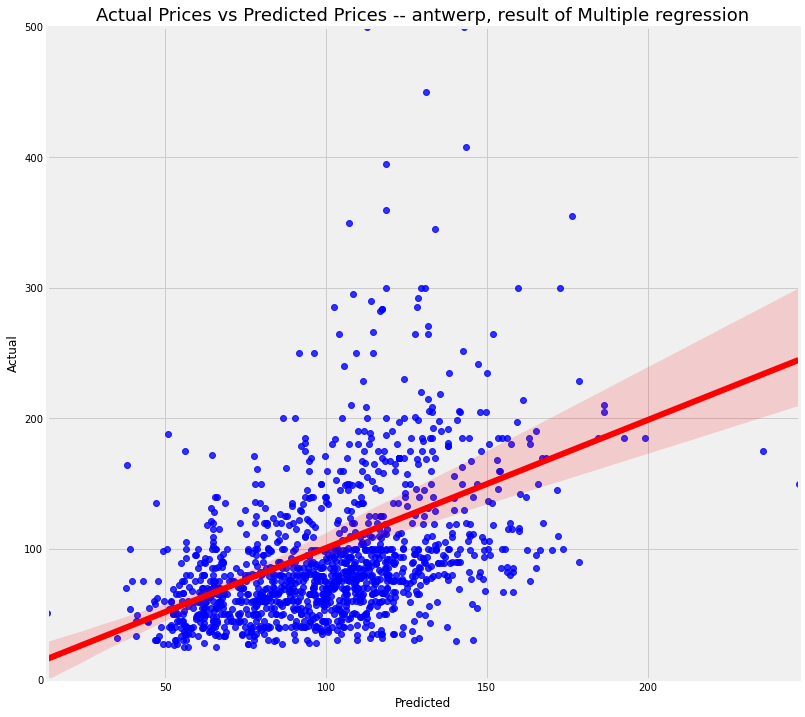

In [26]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- antwerp, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/airbnb_antwerp_multiple_regression.png')



In [27]:
df_result.shape

(1324, 3)

## The most mispriced [undervalued]

In [28]:
antwerp_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
antwerp_mispriced['%'] = (antwerp_mispriced['Actual']/ antwerp_mispriced['Predicted'] -1) *100
antwerp_mispriced_perc = antwerp_mispriced.sort_values(by=['%'], ascending=True)
antwerp_mispriced_perc_plot = antwerp_mispriced_perc.loc[(antwerp_mispriced_perc['Predicted']>=1) & (antwerp_mispriced_perc['Diff']>= 1)]
antwerp_mispriced_perc_plot = antwerp_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
antwerp_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
827,30,145.635612,115.635612,-79.400643
748,29,140.499563,111.499563,-79.359366
1308,30,127.371508,97.371508,-76.446852
1748,32,129.079593,97.079593,-75.209094
894,32,117.550154,85.550154,-72.777577


In [34]:

antwerp_mispriced_1 = raw_df_antwerp.loc[raw_df_antwerp.id==827]
antwerp_mispriced_2 = raw_df_antwerp.loc[raw_df_antwerp.id==748]
antwerp_mispriced_3 = raw_df_antwerp.loc[raw_df_antwerp.index==1308]
antwerp_mispriced_4 = raw_df_antwerp.loc[raw_df_antwerp.index==1748]
antwerp_mispriced_5 = raw_df_antwerp.loc[raw_df_antwerp.index==894]

In [36]:
id_array = [827, 748, 1308, 1748, 894]

antwerp_mispriced_query = raw_df_antwerp.query('index in @id_array')
antwerp_mispriced_query = antwerp_mispriced_query.rename({'index': 'id'}, axis=1)
antwerp_mispriced_query.shape
#antwerp_mispriced_query.head(1)

(5, 74)

In [38]:
#antwerp_mispriced_neg = raw_df_antwerp.loc[raw_df_antwerp.index==4119]
antwerp_mispriced_perc_1 = raw_df_antwerp.loc[raw_df_antwerp.id==877]
antwerp_mispriced_perc_2 = raw_df_antwerp.loc[raw_df_antwerp.id==748]
antwerp_mispriced_perc_3 = raw_df_antwerp.loc[raw_df_antwerp.id==1308]
antwerp_mispriced_perc_4 = raw_df_antwerp.loc[raw_df_antwerp.id==1748]
antwerp_mispriced_perc_5 = raw_df_antwerp.loc[raw_df_antwerp.id==894]

In [39]:
antwerp_mispriced = antwerp_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
antwerp_mispriced_1 = antwerp_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

antwerp_mispriced_1[:1]
antwerp_mispriced_1[:2]
antwerp_mispriced_1[:3]
antwerp_mispriced_1[:4]
antwerp_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
748,33599568,$29.00,4.46,4.46,4.15,4.69,4.54,4.31,"Antwerpen, Vlaanderen, Belgium",https://www.airbnb.com/rooms/33599568
827,36078330,$30.00,4.00,3.75,4.25,3.75,4.25,4.00,NaN,https://www.airbnb.com/rooms/36078330
894,38067907,$32.00,5.00,4.71,4.86,5.00,5.00,4.57,"Antwerpen, Vlaanderen, Belgium",https://www.airbnb.com/rooms/38067907
1308,46653323,$30.00,5.00,5.00,4.50,5.00,5.00,4.50,NaN,https://www.airbnb.com/rooms/46653323
1748,52919278,$32.00,5.00,5.00,5.00,5.00,4.00,5.00,NaN,https://www.airbnb.com/rooms/52919278


In [40]:
dfi.export(antwerp_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/airbnb_antwerp_mispriced.png")



## The best score

In [48]:
antwerp_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
antwerp_high_value.head(6)

,Actual,Predicted,Diff
1168,150,246.921907,96.921907
1227,175,236.032124,61.032124
1095,185,199.114607,14.114607
390,185,192.743814,7.743814
263,210,186.587885,-23.412115
386,205,186.348208,-18.651792


In [49]:
id_array = [386, 1227, 1095, 390, 263]

antwerp_best_score_query = raw_df_antwerp.query('index in @id_array')
antwerp_best_score_query = antwerp_best_score_query.rename({'index': 'id'}, axis=1)
#antwerp_best_score_query.head(1)

In [50]:
antwerp_best_score = antwerp_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
antwerp_best_score_1 = antwerp_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

antwerp_best_score_1[:1]
antwerp_best_score_1[:2]
antwerp_best_score_1[:3]
antwerp_best_score_1[:4]
antwerp_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
263,15464986,$210.00,4.67,4.33,5.00,5.00,4.33,4.33,NaN,https://www.airbnb.com/rooms/15464986
386,20222569,$205.00,4.00,3.47,4.67,4.00,4.93,4.47,"Antwerpen, Vlaanderen, Belgium",https://www.airbnb.com/rooms/20222569
390,20312581,$185.00,3.57,3.14,4.29,3.29,4.86,3.57,"Antwerpen, Vlaanderen, Belgium",https://www.airbnb.com/rooms/20312581
1095,42107925,$185.00,4.00,4.00,5.00,5.00,4.00,5.00,NaN,https://www.airbnb.com/rooms/42107925
1227,45064492,$175.00,3.00,1.50,4.00,4.50,5.00,2.00,NaN,https://www.airbnb.com/rooms/45064492


In [51]:
dfi.export(antwerp_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/antwerp/airbnb_antwerp_best_score.png")


